In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
# load the datasets
train_data = pd.read_csv('data/train.txt', header=None, sep=';', names=['Text', 'Emotion'], encoding='utf-8')
test_data = pd.read_csv('data/test.txt', header=None, sep=';', names=['Text', 'Emotion'], encoding='utf-8')
val_data = pd.read_csv('data/val.txt', header=None, sep=';', names=['Text', 'Emotion'], encoding='utf-8')

In [3]:
# check the shape of the datasets
print('Train data: ', train_data.shape)
print('Test data: ', test_data.shape)
print('Validation data: ', val_data.shape)

Train data:  (16000, 2)
Test data:  (2000, 2)
Validation data:  (2000, 2)


In [4]:
# check the empty value
print(train_data.isnull().sum())
print(test_data.isnull().sum())
print(val_data.isnull().sum())

Text       0
Emotion    0
dtype: int64
Text       0
Emotion    0
dtype: int64
Text       0
Emotion    0
dtype: int64


In [5]:
train_data.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


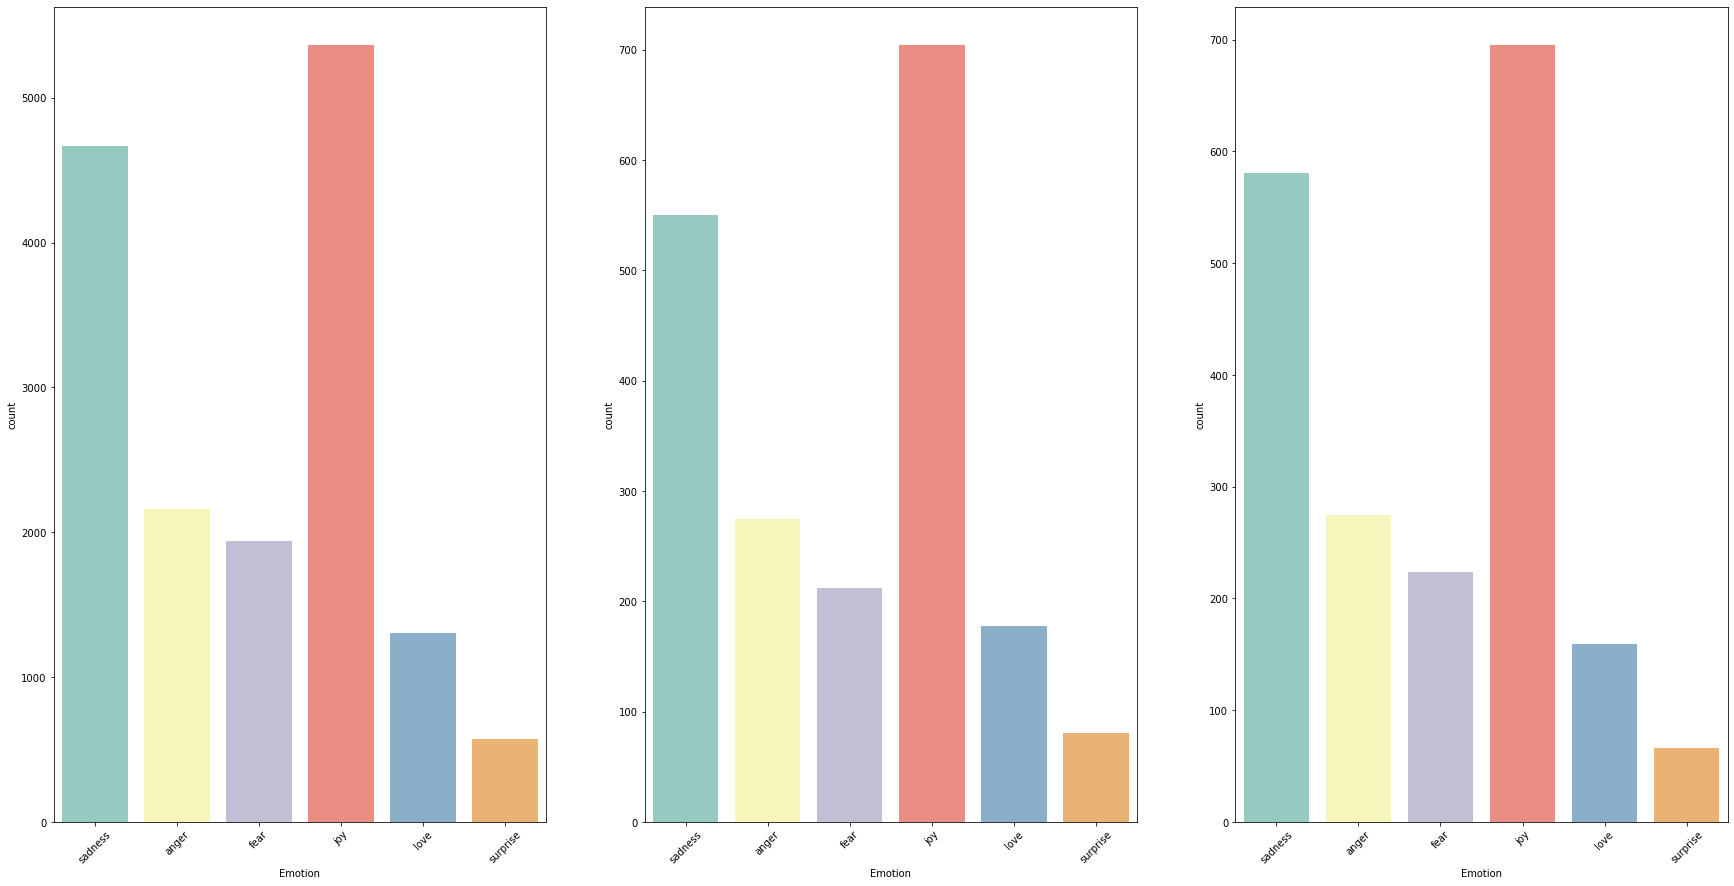

In [21]:
# draw a countplot of training, validation and testing data
all_data = {'Train':train_data,'Validation':val_data,'Test':test_data}
emo_order = ['sadness','anger','fear','joy','love','surprise']
fig, ax = plt.subplots(1,3, figsize=(30,15))
for i, df in enumerate(all_data.values()):
    figs = sns.countplot(data=df,x='Emotion',ax=ax[i],palette='Set3',order=emo_order)
    figs.set_xticklabels(figs.get_xticklabels(), rotation=45)
plt.show()

Data Pre-processing

In [6]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re 
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

import warnings
warnings.filterwarnings('ignore')

In [7]:
def preprocess(text):
    lemmatizer = WordNetLemmatizer()
    text = re.sub('[^a-zA-Z]', ' ', text) # punctuation removal
    text = text.lower() # convert to lowercase
    words = text.split()
    words = [w for w in words if not w in stop_words] # removing stopwords
    # lemmatizing
    words = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(words)

In [8]:
# preprocess on train data
train_data['Clean_Text'] = train_data['Text'].apply(preprocess)
train_data['Label_Emotion'] = lb.fit_transform(train_data['Emotion'])
train_data['Length'] = [len(x.split()) for x in train_data['Clean_Text']]

In [9]:
train_data.head()

,Text,Emotion,Clean_Text,Label_Emotion,Length
0,i didnt feel humiliated,sadness,didnt feel humiliated,4,3
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...,4,9
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong,0,7
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...,3,7
4,i am feeling grouchy,anger,feeling grouchy,0,2


In [10]:
train_data['Length'].describe()

count    16000.000000
mean         9.353063
std          5.213083
min          1.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         35.000000
Name: Length, dtype: float64

<AxesSubplot:xlabel='Length', ylabel='Count'>

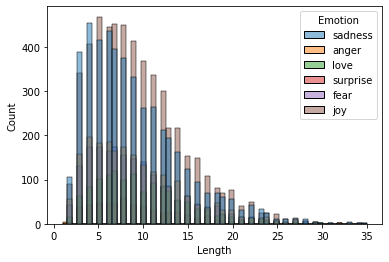

In [11]:
sns.histplot(x=train_data['Length'], hue=train_data['Emotion'])

In [12]:
# preprocess on validation data
val_data['Clean_Text'] = val_data['Text'].apply(preprocess)
val_data['Label_Emotion'] = lb.fit_transform(val_data['Emotion'])
val_data['Length'] = [len(x.split()) for x in val_data['Clean_Text']]

In [13]:
val_data.head()

,Text,Emotion,Clean_Text,Label_Emotion,Length
0,im feeling quite sad and sorry for myself but ...,sadness,im feeling quite sad sorry ill snap soon,4,8
1,i feel like i am still looking at a blank canv...,sadness,feel like still looking blank canvas blank pie...,4,9
2,i feel like a faithful servant,love,feel like faithful servant,3,4
3,i am just feeling cranky and blue,anger,feeling cranky blue,0,3
4,i can have for a treat or if i am feeling festive,joy,treat feeling festive,2,3


In [14]:
val_data['Length'].describe()

count    2000.000000
mean        9.202500
std         5.112099
min         2.000000
25%         5.000000
50%         8.000000
75%        12.000000
max        31.000000
Name: Length, dtype: float64

<AxesSubplot:xlabel='Length', ylabel='Count'>

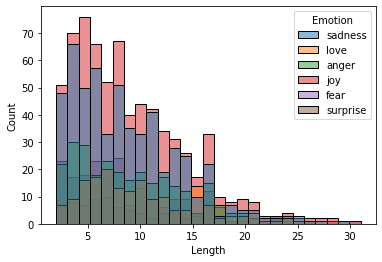

In [15]:
sns.histplot(x=val_data['Length'], hue=val_data['Emotion'])

In [16]:
# preprocess on test data
test_data['Clean_Text'] = test_data['Text'].apply(preprocess)
test_data['Label_Emotion'] = lb.fit_transform(test_data['Emotion'])
test_data['Length'] = [len(x.split()) for x in test_data['Clean_Text']]

In [17]:
test_data.head()

,Text,Emotion,Clean_Text,Label_Emotion,Length
0,im feeling rather rotten so im not very ambiti...,sadness,im feeling rather rotten im ambitious right,4,7
1,im updating my blog because i feel shitty,sadness,im updating blog feel shitty,4,5
2,i never make her separate from me because i do...,sadness,never make separate ever want feel like ashamed,4,8
3,i left with my bouquet of red and yellow tulip...,joy,left bouquet red yellow tulip arm feeling slig...,2,10
4,i was feeling a little vain when i did this one,sadness,feeling little vain one,4,4


In [18]:
test_data['Length'].describe()

count    2000.000000
mean        9.301500
std         5.143036
min         2.000000
25%         5.000000
50%         8.000000
75%        12.000000
max        31.000000
Name: Length, dtype: float64

<AxesSubplot:xlabel='Length', ylabel='Count'>

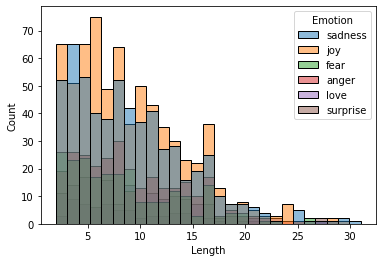

In [19]:
sns.histplot(x=test_data['Length'], hue=test_data['Emotion'])

In [20]:
# create a list to store all sentences from the 3 datasets
all_sent = []
all_sent.extend(train_data['Clean_Text'].values)
all_sent.extend(test_data['Clean_Text'].values)
all_sent.extend(val_data['Clean_Text'].values)
print(len(all_sent))

20000


In [21]:
# use the tokenizer to fit on the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_sent)

In [22]:
# check the vocabulary size
print(len(tokenizer.word_index))

15104


In [24]:
# save the tokenizer and the laber encoder fitted on the dataset
with open('assets/tokenizer.pickle', 'wb') as f: 
    pickle.dump(tokenizer, f)
with open('assets/label_encoder.pickle','wb') as file:
    pickle.dump(lb,file)

In [25]:
x_train = train_data['Clean_Text']
y_train = train_data['Label_Emotion']

In [26]:
# convert the train texts to sequences
x_train = tokenizer.texts_to_sequences(x_train)
x_train_pad = pad_sequences(x_train,maxlen=35)

In [27]:
x_train_pad

array([[   0,    0,    0, ...,   54,    1,  519],
       [   0,    0,    0, ...,   52,  179, 1266],
       [   0,    0,    0, ...,    1,  389,  310],
       ...,
       [   0,    0,    0, ...,  240,   33, 1232],
       [   0,    0,    0, ...,  377,    4,  253],
       [   0,    0,    0, ...,    1,  201, 3730]], dtype=int32)

In [28]:
y_train = to_categorical(y_train)

In [29]:
y_train

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [30]:
print(x_train_pad.shape, y_train.shape)

(16000, 35) (16000, 6)


In [31]:
x_val = val_data['Clean_Text']
y_val = val_data['Label_Emotion']

In [32]:
# convert the train texts to sequences
x_val = tokenizer.texts_to_sequences(x_val)
x_val_pad = pad_sequences(x_val,maxlen=35)

In [33]:
x_val_pad

array([[    0,     0,     0, ...,   116,  2844,   416],
       [    0,     0,     0, ...,   489,   569,   893],
       [    0,     0,     0, ...,     3,   485, 14354],
       ...,
       [    0,     0,     0, ...,  2732,   235,    14],
       [    0,     0,     0, ...,   397,   602,  2007],
       [    0,     0,     0, ...,  1207,    21,    15]], dtype=int32)

In [34]:
y_val = to_categorical(y_val)

In [35]:
y_val

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [36]:
print(x_val_pad.shape, y_val.shape)

(2000, 35) (2000, 6)


In [37]:
x_test = test_data['Clean_Text']
y_test = test_data['Label_Emotion']

In [38]:
# convert the train texts to sequences
x_test = tokenizer.texts_to_sequences(x_test)
x_test_pad = pad_sequences(x_test,maxlen=35)

In [39]:
x_test_pad

array([[   0,    0,    0, ...,    4, 4543,   37],
       [   0,    0,    0, ...,  115,    1,  352],
       [   0,    0,    0, ...,    1,    3,  293],
       ...,
       [   0,    0,    0, ...,  193,    2, 2640],
       [   0,    0,    0, ...,  101,  699, 2149],
       [   0,    0,    0, ...,  180,  180, 1724]], dtype=int32)

In [40]:
y_test = to_categorical(y_test)

In [41]:
y_test

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [42]:
print(x_test_pad.shape, y_test.shape)

(2000, 35) (2000, 6)


Training

In [43]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,Dropout

In [44]:
model = Sequential()
model.add(Embedding(input_dim=15105,output_dim=128,input_length=35))
model.add(LSTM(128))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6,activation='softmax'))

2022-07-27 20:45:38.871271: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [45]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 35, 128)           1933440   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 2,073,670
Trainable params: 2,073,670
Non-trainable params: 0
_________________________________________________________________


In [46]:
hist=model.fit(x_train_pad,y_train,epochs=20,batch_size = 512,validation_data=(x_val_pad,y_val))

2022-07-27 20:45:45.726836: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
32/32 [==============================] - 12s 287ms/step - loss: 1.6457 - accuracy: 0.3216 - val_loss: 1.5588 - val_accuracy: 0.4540
Epoch 2/20
32/32 [==============================] - 8s 263ms/step - loss: 1.4480 - accuracy: 0.4577 - val_loss: 1.1629 - val_accuracy: 0.5845
Epoch 3/20
32/32 [==============================] - 9s 272ms/step - loss: 0.8684 - accuracy: 0.6843 - val_loss: 0.7697 - val_accuracy: 0.7670
Epoch 4/20
32/32 [==============================] - 9s 274ms/step - loss: 0.4951 - accuracy: 0.8397 - val_loss: 0.6091 - val_accuracy: 0.8165
Epoch 5/20
32/32 [==============================] - 8s 264ms/step - loss: 0.2703 - accuracy: 0.9142 - val_loss: 0.4882 - val_accuracy: 0.8590
Epoch 6/20
32/32 [==============================] - 8s 262ms/step - loss: 0.1616 - accuracy: 0.9514 - val_loss: 0.4758 - val_accuracy: 0.8610
Epoch 7/20
32/32 [==============================] - 9s 273ms/step - loss: 0.1183 - accuracy: 0.9657 - val_loss: 0.5231 - val_accuracy: 0.8710
Epoch

In [55]:
model.save('models/model.h5', hist)

In [47]:
from sklearn.metrics import classification_report

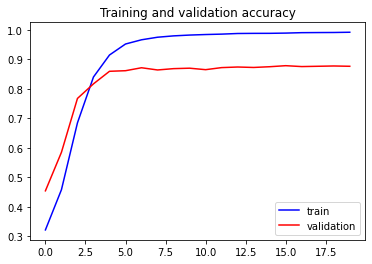

In [48]:
plt.plot(hist.history['accuracy'],c='b',label='train')
plt.plot(hist.history['val_accuracy'],c='r',label='validation')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

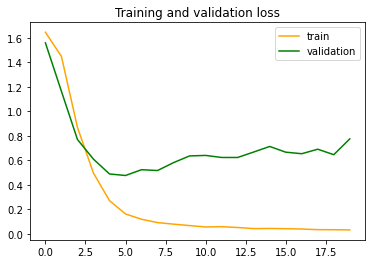

In [49]:
plt.plot(hist.history['loss'],c='orange',label='train')
plt.plot(hist.history['val_loss'],c='g',label='validation')
plt.title('Training and validation loss')
plt.legend(loc='upper right')
plt.show()

In [50]:
model.evaluate(x_test_pad,y_test)

63/63 [==============================] - 1s 13ms/step - loss: 0.7413 - accuracy: 0.8650


[0.741263747215271, 0.8650000095367432]

In [51]:
y_test_true = test_data['Label_Emotion'].values
y_test_pred = np.argmax(model.predict(x_test_pad), axis=1)

In [52]:
y_test_true

array([4, 4, 4, ..., 2, 2, 1])

In [53]:
y_test_pred

array([4, 4, 4, ..., 2, 2, 1])

In [54]:
from sklearn import metrics
print(metrics.classification_report(y_test_true, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       275
           1       0.83      0.82      0.83       224
           2       0.87      0.92      0.90       695
           3       0.71      0.72      0.72       159
           4       0.93      0.90      0.91       581
           5       0.65      0.67      0.66        66

    accuracy                           0.86      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.87      0.86      0.87      2000

